## Part 2: Binary Image Processing and Morphological Operators

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm
from skimage import measure

In [3]:
def process_apples(img):
    
    # get hsv values for thresholding; with rgb it was not coming to be be less accurate
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Threshold based on both light and dark red color ranges
    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

    # upper mask (170-180)
    lower_red = np.array([170,50,50])
    upper_red = np.array([180,255,255])
    mask1 = cv2.inRange(img_hsv, lower_red, upper_red)

    # join masks
    mask = mask0+mask1

    # set my output img to zero everywhere except my mask
    output_img = img.copy()
    output_img[np.where(mask==0)] = 0

    output_img = cv2.cvtColor( output_img, cv2.COLOR_BGR2RGB)
    imgplot = plt.imshow( output_img)
    plt.title("Separate apple from background\n based on thresholding")
    plt.show()

    return output_img

font = cv2.FONT_HERSHEY_SIMPLEX
def calcArea_filterApples_calcPerimeterCompactness(img, area_threshold, font_size, font_weight, rec_Width=1, appleColor='R'):
    
    mask = np.ones(img.shape, dtype="uint8") * 255
    img_ = np.zeros(( img.shape[0], img.shape[1], 3))
    
    # Finding contours of the image
    cnts = cv2.findContours(img, 1, cv2.CHAIN_APPROX_SIMPLE)

    contourArea = []
    contourPerimeter = []
    appleCount = 0
    
    for i, contour in enumerate(cnts[1]):
        area = cv2.contourArea(contour)
        if area>area_threshold:
            cv2.drawContours(mask, [contour], -1, 0, -1)
            appleCount+=1
            
            contourArea.append(area)
            contourPerimeter.append(round(cv2.arcLength(contour,True),2))
            
            x,y,w,h = cv2.boundingRect(contour)
            
            if appleColor == 'R':
                cv2.rectangle(img_,(x,y),(x+w,y+h),(0,255,0),rec_Width)
                cv2.putText(img_, str(appleCount),(x,y-3), font, font_size,(0,255,0), font_weight, cv2.LINE_AA)
            else:
                cv2.rectangle(img_,(x,y),(x+w,y+h),(255,0,0),rec_Width)
                cv2.putText(img_, str(appleCount),(x,y-3), font, font_size,(255,0,0), font_weight, cv2.LINE_AA)
    
    if appleColor == 'R':
        img_[:,:,0] = cv2.bitwise_not(mask.copy())
    else:
        img_[:,:,1] = cv2.bitwise_not(mask.copy())
    imgplot = plt.imshow( img_)
    plt.title("Apples Index")
    plt.show()
    
    return contourArea, contourPerimeter, img_[:,:,0]

# 1

### FakeApples.bmp

### a. FakeApples.bmp

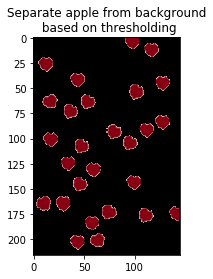

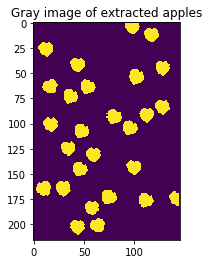

In [21]:
img=cv2.imread("FakeApples.bmp")
img = process_apples(img)
gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Gray image of extracted apples")
plt.show()

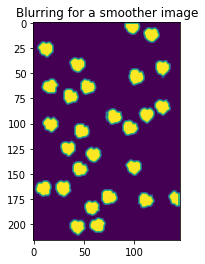

In [22]:
blur = cv2.blur(gray,(3,3))
imgplot = plt.imshow( blur)
plt.title("Blurring for a smoother image")
plt.show()

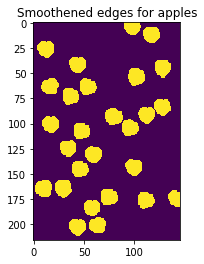

In [23]:
gray= blur.copy()
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Smoothened edges for apples")
plt.show()

In [24]:
# Taking a square kernel
kernel = np.ones((3,3),np.uint8)
print (kernel)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


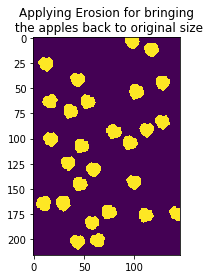

In [25]:
erode = cv2.morphologyEx(gray, cv2.MORPH_ERODE, kernel)
imgplot = plt.imshow( erode)
plt.title("Applying Erosion for bringing\n the apples back to original size")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


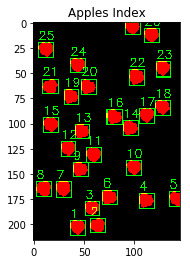

In [26]:
area_threshold = 100
font_weight = 1
font_size = 0.4
contourArea, contourPerimeter, img_ = calcArea_filterApples_calcPerimeterCompactness( erode, area_threshold, font_size, font_weight)

In [27]:
print ("Index, Area, Perimeter, Compactness")
for i, area in enumerate(contourArea):
    print (str(i+1)+", "+str(contourArea[i])+", "+str(contourPerimeter[i])+", "+str(round( (contourPerimeter[i]**2)/(4*np.pi*contourArea[i]),2)))

Index, Area, Perimeter, Compactness
1, 142.0, 46.28, 1.2
2, 140.0, 45.8, 1.19
3, 133.5, 45.21, 1.22
4, 141.5, 48.38, 1.32
5, 103.0, 42.14, 1.37
6, 138.5, 45.56, 1.19
7, 141.5, 46.04, 1.19
8, 141.5, 46.38, 1.21
9, 141.0, 46.97, 1.25
10, 140.0, 45.46, 1.17
11, 145.0, 45.46, 1.13
12, 135.5, 45.21, 1.2
13, 140.5, 46.73, 1.24
14, 144.5, 47.21, 1.23
15, 143.0, 46.28, 1.19
16, 146.0, 47.8, 1.25
17, 137.0, 46.28, 1.24
18, 139.0, 47.46, 1.29
19, 142.5, 46.38, 1.2
20, 141.0, 47.8, 1.29
21, 141.0, 46.63, 1.23
22, 143.0, 46.63, 1.21
23, 139.0, 45.8, 1.2
24, 140.0, 45.46, 1.17
25, 142.0, 46.28, 1.2
26, 143.0, 44.63, 1.11
27, 120.5, 43.56, 1.25


In [28]:
print ("No. of apples: "+str(len(contourArea)))

No. of apples: 27


### b. Apples.JPG

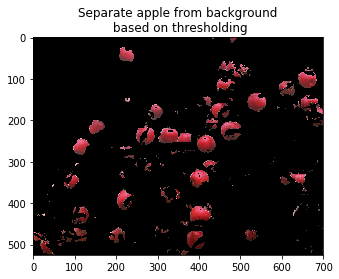

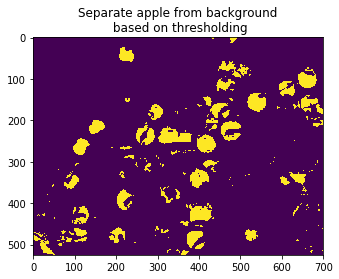

In [29]:
img=cv2.imread("Apples.JPG")
img = process_apples(img)
gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Separate apple from background\n based on thresholding")
plt.show()

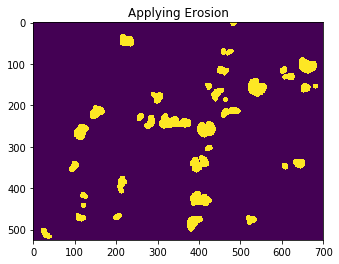

In [30]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(12,12))
opening = cv2.morphologyEx( gray, cv2.MORPH_OPEN, kernel)
imgplot = plt.imshow( opening)
plt.title("Applying Opening")
plt.show()

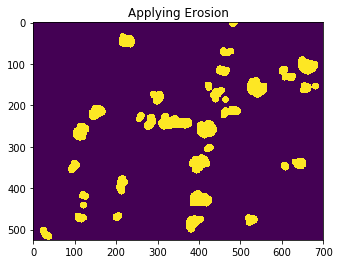

In [31]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
dilating = cv2.morphologyEx( opening, cv2.MORPH_DILATE, kernel)
imgplot = plt.imshow( dilating)
plt.title("Applying Dilation")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


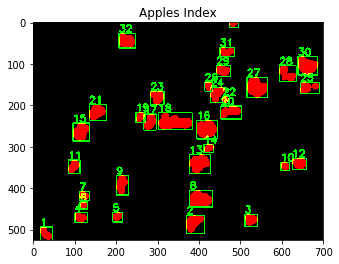

In [32]:
area_threshold = 120
font_weight = 3
font_size = 0.8
rec_Width = 2
contourArea, contourPerimeter, img_ = calcArea_filterApples_calcPerimeterCompactness( dilating, area_threshold, font_size, font_weight, rec_Width)

In [33]:
# Compactness can be defined for example as the perimeter squared, divided by 4piarea, so that a circle has a compactness of 1.
# https://en.wikipedia.org/wiki/Compactness_measure_of_a_shape
# http://ceur-ws.org/Vol-1814/paper-04.pdf
# http://answers.opencv.org/question/51602/has-opencv-built-in-functions-to-calculate-circularity-compactness-etc-for-contoursblobs/
# https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=moments#structural-analysis-and-shape-descriptors

In [34]:
for i, area in enumerate(contourArea):
    print (str(i+1)+", "+str(contourArea[i])+", "+str(contourPerimeter[i])+", "+str(round( (contourPerimeter[i]**2)/(4*np.pi*contourArea[i]),2)))

1, 586.0, 100.08, 1.36
2, 1169.5, 140.47, 1.34
3, 639.0, 99.25, 1.23
4, 513.0, 88.77, 1.22
5, 378.5, 74.18, 1.16
6, 219.0, 55.46, 1.12
7, 352.0, 71.94, 1.17
8, 1602.5, 163.3, 1.32
9, 889.0, 126.23, 1.43
10, 304.5, 65.7, 1.13
11, 597.5, 96.33, 1.24
12, 689.5, 101.01, 1.18
13, 1544.5, 160.61, 1.33
14, 322.0, 69.11, 1.18
15, 1199.0, 135.05, 1.21
16, 1621.0, 160.37, 1.26
17, 766.0, 111.74, 1.3
18, 2247.0, 225.68, 1.8
19, 373.5, 74.18, 1.17
20, 970.5, 138.81, 1.58
21, 1058.0, 127.05, 1.21
22, 182.0, 50.63, 1.12
23, 776.0, 111.74, 1.28
24, 806.5, 116.81, 1.35
25, 771.5, 135.64, 1.9
26, 306.0, 66.28, 1.14
27, 1704.5, 162.95, 1.24
28, 888.0, 142.57, 1.82
29, 631.5, 99.84, 1.26
30, 1486.5, 151.3, 1.23
31, 550.0, 98.91, 1.42
32, 1059.5, 127.5, 1.22
33, 181.5, 56.38, 1.39


In [35]:
print ("No. of apples: "+str(len(contourArea)))

No. of apples: 33


### c. AuroraWall.JPG

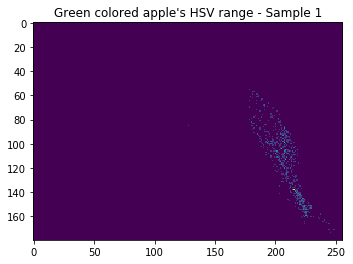

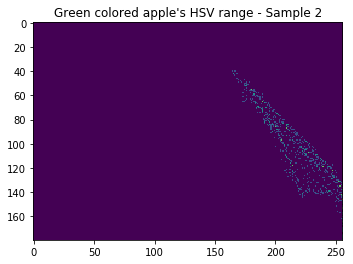

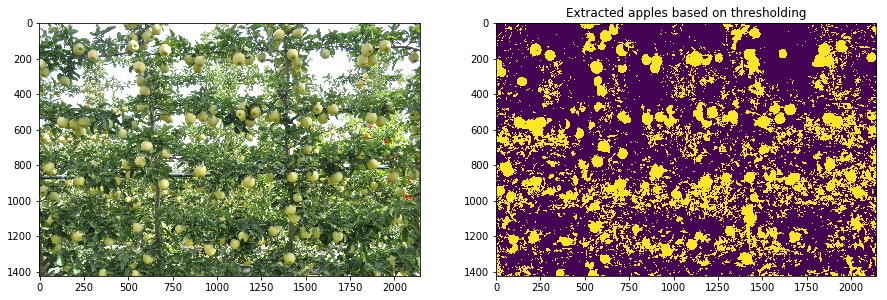

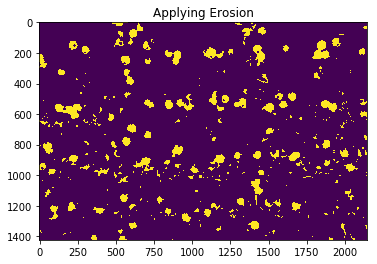

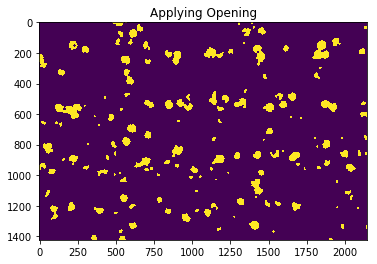

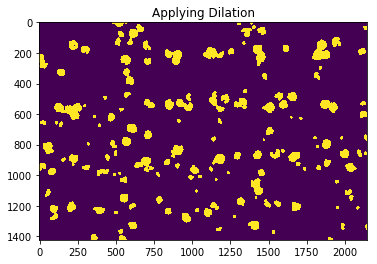

In [84]:
# Histogram of green colored apple's HSV
img=cv2.imread("1.png")
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [img], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist,interpolation = 'nearest')
plt.title('Green colored apple\'s HSV range - Sample 1')
plt.show()

img=cv2.imread("2.png")
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [img], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist,interpolation = 'nearest')
plt.title('Green colored apple\'s HSV range - Sample 2')
plt.show()

img=cv2.imread("AuroraWall.JPG")

# get hsv values for thresholding; with rgb it was not coming to be be less accurate
img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold based on both light green color ranges

lower_green = np.array([10,20,60])
upper_green = np.array([41,255,255])
mask = cv2.inRange(img_hsv, lower_green, upper_green)

# set my output img to zero everywhere except my mask
output_img = img.copy()
output_img[np.where(mask==0)] = 0

gray = cv2.cvtColor( output_img, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
img_=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
f = plt.figure(figsize=(15,12))
ax= f.subplots(1,2)

ax[0].imshow(img_)
ax[1].imshow(gray)
plt.title("Extracted apples based on thresholding")
plt.show()

# Select a kernel for applying morphological operation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,12))

# Applying Erosion to find round (based on kernel) objects or apples
erosion = cv2.erode( output_img, kernel, iterations = 1)
gray = cv2.cvtColor( erosion, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Applying Erosion")
plt.show()

# Applying Opening to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,12))
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
gray = cv2.cvtColor( opening, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Applying Opening")
plt.show()

# Applying Dilation to increase to original apple size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(8,9))
dilation = cv2.dilate(opening,kernel,iterations = 1)
gray = cv2.cvtColor( dilation, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Applying Dilation")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


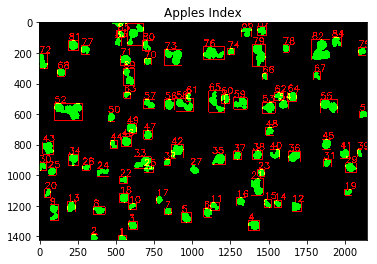

In [87]:
area_threshold = 1000
font_weight = 5
font_size = 2
contourArea, contourPerimeter, img_ = calcArea_filterApples_calcPerimeterCompactness( gray, area_threshold, font_size, font_weight, 3, 'G')

In [39]:
for i, area in enumerate(contourArea):
    print (str(i+1)+", "+str(contourArea[i])+", "+str(contourPerimeter[i])+", "+str(round( (contourPerimeter[i]**2)/(4*np.pi*contourArea[i]),2)))

1, 1241.0, 150.77, 1.46
2, 1370.5, 145.84, 1.23
3, 2165.0, 184.37, 1.25
4, 3337.0, 231.34, 1.28
5, 3023.0, 218.85, 1.26
6, 2390.0, 188.85, 1.19
7, 1551.5, 155.98, 1.25
8, 2608.5, 217.44, 1.44
9, 3773.5, 317.81, 2.13
10, 1284.5, 146.61, 1.33
11, 1718.5, 190.61, 1.68
12, 2775.0, 215.54, 1.33
13, 2708.0, 208.85, 1.28
14, 1377.5, 151.78, 1.33
15, 1483.5, 170.47, 1.56
16, 2322.5, 186.95, 1.2
17, 1516.0, 153.54, 1.24
18, 2638.5, 208.75, 1.31
19, 1305.0, 154.23, 1.45
20, 1300.0, 160.71, 1.58
21, 5589.0, 342.11, 1.67
22, 1547.0, 171.05, 1.51
23, 1602.5, 153.15, 1.16
24, 2405.5, 245.24, 1.99
25, 1973.5, 170.81, 1.18
26, 1509.5, 215.1, 2.44
27, 2273.0, 193.34, 1.31
28, 1283.0, 146.57, 1.33
29, 2982.5, 223.24, 1.33
30, 1826.5, 191.98, 1.61
31, 1736.5, 166.95, 1.28
32, 1257.0, 136.57, 1.18
33, 4900.5, 346.84, 1.95
34, 3027.0, 243.34, 1.56
35, 4190.5, 274.55, 1.43
36, 3883.0, 252.65, 1.31
37, 1968.0, 173.54, 1.22
38, 2627.5, 197.92, 1.19
39, 1136.5, 138.33, 1.34
40, 2592.5, 249.24, 1.91
41, 2732.5,

<b>Number of apples detected</b>

In [377]:
print ("No. of apples: "+str(len(contourArea)))

No. of apples: 89


# 4

In [379]:
img=cv2.imread("Circles.png")

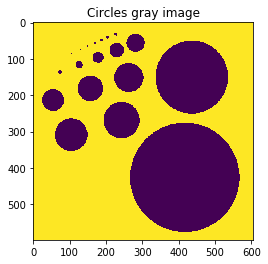

In [380]:
gray = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Circles gray image")
plt.show()

In [381]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

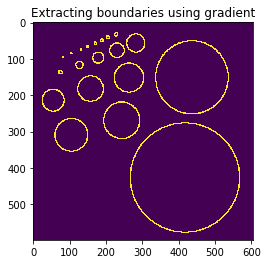

In [382]:
gray = cv2.cvtColor( gradient, cv2.COLOR_BGR2GRAY)
gray[gray>0] = 255
imgplot = plt.imshow( gray)
plt.title("Extracting boundaries using gradient")
plt.show()

# 5

In [4]:
img=cv2.imread("pcb.jpg")

In [5]:
gray = img[:,:,0].copy()
gray[gray<200] = 0
gray[gray>200] = 255

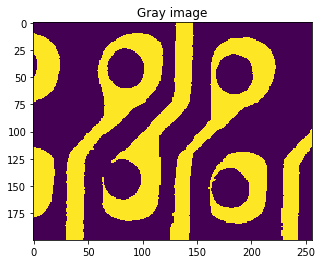

In [6]:
imgplot = plt.imshow( gray)
plt.title("Gray image")
plt.show()

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

In [30]:
kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [59]:
circles = cv2.HoughCircles( gray, cv2.HOUGH_GRADIENT, 1, gray.shape[0]/4, param1=1, param2=20, minRadius=0, maxRadius=40)

In [60]:
circles

array([[[ 84.5,  43.5,  16.8],
        [184.5,  48.5,  16.8],
        [179.5, 152.5,  18.1],
        [ 82.5, 145.5,  16. ]]], dtype=float32)

In [79]:
cimg_ = np.zeros(gray.shape)
cimg = np.zeros(list(gray.shape)+[3])
cimg[:,:,0] = gray.copy()

In [80]:
for i in circles[0,:]:
    cv2.circle(cimg_,(i[0],i[1]),i[2],255,2)

In [81]:
cimg[:,:,1] = cimg_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


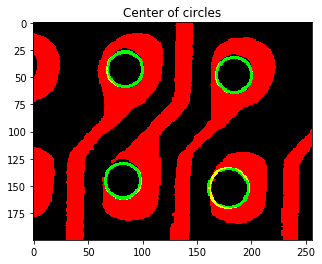

In [82]:
imgplot = plt.imshow( cimg)
plt.title("Center of circles")
plt.show()